# Analyze the readings from the accelerometer/gyroscope to fit gyroscopic acceleration in the z-direction and linear acceleration in the x-direction.

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('default')

In [221]:
path = input('file name (type "def" to use default): ')

# turn all the data into numpy arrays
names = 'count, timestamp, x_accel, y_accel, z_accel, x_gyro, y_gyro, z_gyro'
all_data = np.genfromtxt(path, names = names, skip_footer = 1)

In [217]:
# this calibration factor came from the calibration of device taped to wall,
# where I took one reading with the x-axis facing up and one
# with the x-axis facing down
M_S_2_PER_BIT = 0.0005994292667111093

# so for linear acceleration, we can convert the bits to m/s^2
timestamp = all_data['timestamp']
x_accel = all_data['x_accel']*M_S_2_PER_BIT
y_accel = all_data['y_accel']*M_S_2_PER_BIT
z_accel = all_data['z_accel']*M_S_2_PER_BIT
z_gyro_bits = all_data['z_gyro']

In [218]:
# define functions designed for scipy's curve fit that can guess paramters
def x_accel_to_fit(t, g, ka, d, e, f):
    return g *np.exp(-ka*t)* np.cos( (d*np.cos(w*t)+e*np.sin(w*t)) ) + f
def theta_accel(t, k, w, a, b, c):
    return np.exp(-k*t) * ( w * ( a * np.cos(w*t) + b * np.sin(w*t) ) ) + c

In [219]:
# this is where the actual fitting begins
popt0_guesses =  [2, .1, 4, 4, 4, np.average(x_accel)]
popt1_guesses = [.01, 4, 2500, 2500, np.average(z_gyro_bits)]
popt1, pcov1 = curve_fit(theta_accel, timestamp, z_gyro_bits, popt1_guesses)

w = popt1[1] # needed for the next fit!
popt0, pcov0 = curve_fit(x_accel_to_fit, timestamp, x_accel)

Text(0, 0.5, 'Gyroscopic Acceleration (bits)')

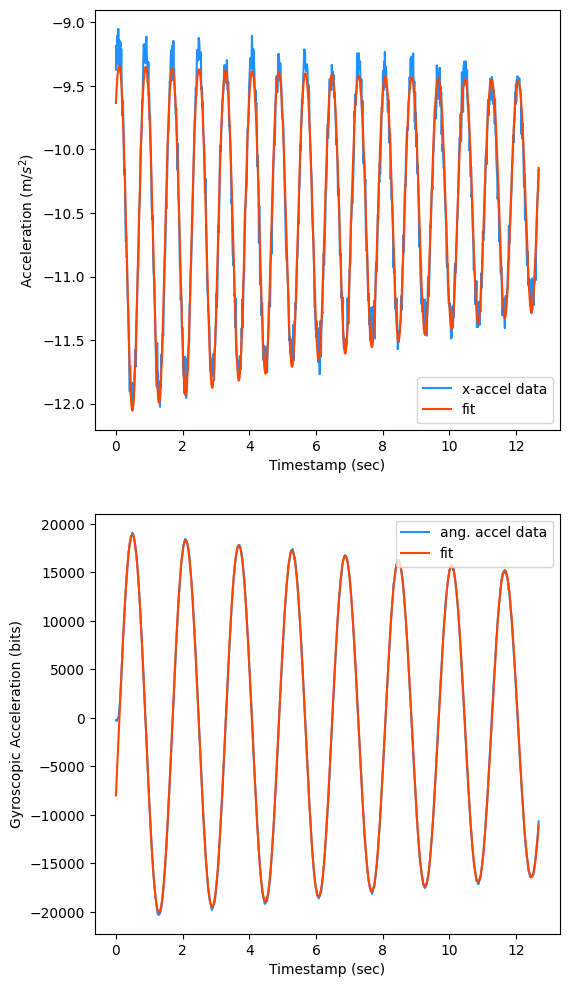

In [220]:
# plot the fits
accel_fit = x_accel_to_fit(timestamp, *popt0)
rad_accel_fit = theta_accel(timestamp, *popt1)
fig, ax = plt.subplots(2,1, figsize = (6,12))
ax[0].plot(timestamp, x_accel, c = 'dodgerblue', label = 'x-accel data')
ax[0].plot(timestamp, accel_fit, c= 'orangered', label = 'fit')
ax[0].legend()
ax[0].set_xlabel('Timestamp (sec)')
ax[0].set_ylabel('Acceleration (m$/s^{2}$)')

ax[1].plot(timestamp, z_gyro_bits, c = 'dodgerblue', label = 'ang. accel data')
ax[1].plot(timestamp, rad_accel_fit, c= 'orangered', label = 'fit')
ax[1].legend()
ax[1].set_xlabel('Timestamp (sec)')
ax[1].set_ylabel('Gyroscopic Acceleration (bits)')